# Eddy Current Brake Design Project

   The main goal of the project is to design an eddy current brake which will be used as a mechanical damper. For this purpose, the project contains two main parts. In the first part of the project, some technical details such as electro magnetic consept and mathematical calculations will be discussed. Then, in the second part, by using the information from the first part, geometrical structure will be designed and the proof of concept will be done by using a FEA software. as FEA software, for simulations COMSOL Multiphysics will be used.
   


## How does the eddy current brake work?

Before starting the finite elemet design and analysis, it is significant to clearly understand its working princple and its relation with electromagnetic rules and equations.

Eddy current brake in its simplest form consists of a disc of conductive material and a permanent magnet. It is also known as magnetic brake. The magnet generates a constant magnetic field on a specific area of the disc of conductive material. The position of that area does not change during the rotation of the disc. However, because of the motion, while one side of the area magnetic field decreases, on the other side of the area magnetic field increases. On these parts of the area, we can say that we have non-constant magnetic fields which will create another opposite directional magnetic fields that should compansate the change of the magnetic field for each side of the area. Then, these magnetic fields induce clockwise and counter-clockwise rotating currents which is called **eddy current**. Finally, the Lorentz forces from the currents slow the disc.

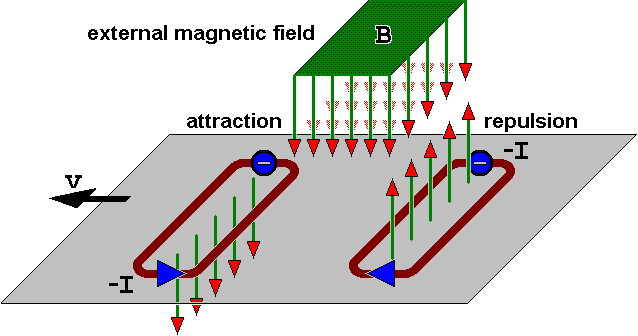

In [3]:
from IPython.display import Image
Image(filename='Images/eddy.png')

Before starting finite element analysis of the magnetic brake, lets see some important formulations about it. Firstly, Deriving equations for eddy current brake system is a high level electromagnetic problem. Also, it needs some scientific approaches and assumptions. Many scientists tried to formulize especially created torque in the system. Lets see some of the reaserches about the topic in the literature.

[1] The first one is W.R. Smythe’s Model (1942). This model considers the problem as a disc of finite radius. For deriving an equation of the torque, it uses the magnetic field which created by eddy current. It models this magnetic field  as a pair of images receding with unuform velicity.

$T=\frac{\omega\gamma R^2\phi^2D}   {(\beta^2\omega^2\gamma^2+R)^2}$


This model is good at low speed but torque decreases too fast in high
speed. In this formula;
T => breaking toque,
$\omega$ => angular velocity,
$\gamma$ => 10^-9 / volume resistivity of the disc, 
$\phi$ => flux,
$\beta$ & D => constant coefficent,
R => reluctance of the electromagnet.

The other approach is D. Schieber’s Model (1974). This approach consider the system as a rotating system. In these kind of systems, both magnet and rotating disc has cylindirical geometry. The formulation is true for low speeds today. It cannot be said that For high speed rotation region the derivation is really valid.

$T=\frac{1}{2} \sigma\delta\omega\pi r^2m^2Bz^2[1-\frac{(r/a)^2} {(1-(m/a)^2)^2}]$

In this formula;
$\sigma$ => electrical conductivity of the rotating disk,
$\beta$ => sheet thickness rotating disk,
$\omega$ => angular velocity,
r => radius of electromagnet,
m => distance of disc axis from pole-face center,
a => disk radius.

According to the litarature study, the last important model is created by J.H. Wouterse in 1991. Wouterse derived braking force for both  low and high speed:

For low speed:

$Fe=\frac{1}{4}\frac{\pi}{\rho}D^2dBo^2c\nu$

For high speed:

$Fe=\frac{1}{\mu o}(\frac{c}{\xi}\frac{\pi}{4}D^2Bo^2\frac{x}{D})^{1/2}\frac{2}{{\frac{\nu}{\nu k}+\frac{\nu k}{\nu}}}$

In this formula;
$\rho$ = specific resistance of disc material
d = disc thickness,
D = diameter of soft iron pole, for non-circular pole shape D denotes the
diameter of the circle with the same area as pole face,
$\zeta$ = ratio of zone width, in asymptotic current distribution around poles, to air gap,
c = proportionality factor, ratio of total disk contour (outward curve)
resistance to resistance of disk contour (outward curve) part under pole,
$\nu$ = tangential speed of the rotating disk, measured at center of pole,
$\nu k$ = critical speed, i.e., speed at which exerted force is maximum,
Bo = air gap induction at zero speed,
x = air gap between pole faces including disc thickness or coordinate
perpendicular to air gap.

## Finite Elemet Analysis Of The Eddy Current Brake

First of all, our design should have these specifications:

- Outer diameter smaller than 50 mm
- Axial Length shorther than 25 mm
- Required Force: 3 Nm at 1620 rpm
- Required Force: 1 Nm at 900 rpm

Therefore, the FEA geometry and metarial selection should be designed for these specifications. Again from literature study and Comsol application gallery, some geometries observed and simulated with the use of FEA. 

Disc thickness is 2 mm, disc radius is 10 mm. Also, magnet height is 15 mm, magnet width 2 mm, magnet length 8 mm, air gap is 1 mm. First geometry is available below:

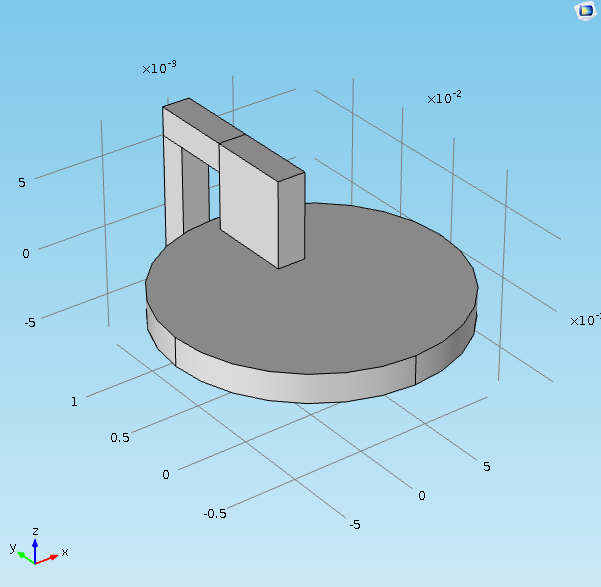

In [1]:
from IPython.display import Image
Image(filename='Images/geo1.png')

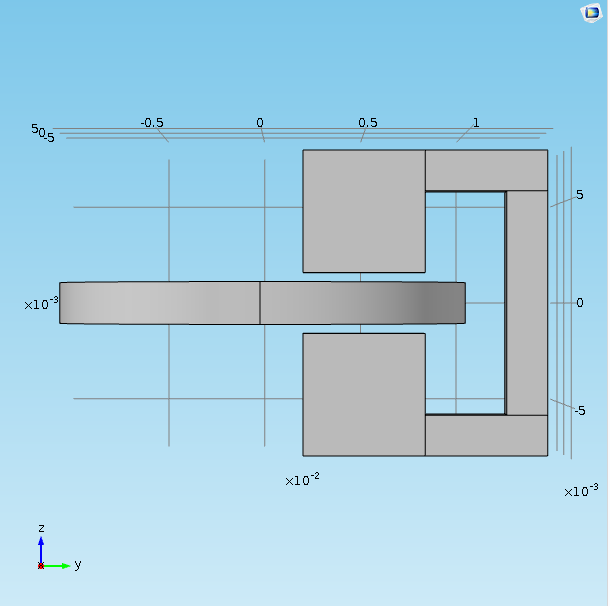

In [3]:
from IPython.display import Image
Image(filename='Images/geo12.png')

After designing the geometry, it is important to assign the materials. For the rest of the analysis, copper is used for the disc, yoke is used for the magnet and the all other parts of the system is filled with air.

In the "variables" part of the "definitions", the moment of inertia of the disc is defined by the use of metarial properties (density) of the disc. Also, before defining the physics, initial disc angular velocity is assigned to the global parameters.

The "mef" (magnetic electric field) and "ode" (ordinary differential equations) physics are choosen for the solution of the problem. The fundamental idea behind this choice is that mef equations will bring us a stationary electromagnetic solution. Then, this stationary electromagnetic parameters will be used as input to ode for time dependent solution. Lastly, the eddy current forces, torques and disc angular velocity will be the outputs which change time dependently.

In the mef, stationary equations will be assigned like below for all domains.

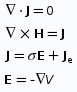

In [5]:
from IPython.display import Image
Image(filename='Images/StationaryEquations.png')

Then, Ampere Law and current conservation rule is defined in the all domain like below. At that point, magnet flux density is assigned as a adjustable parameter. 

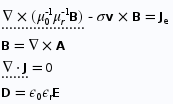

In [6]:
from IPython.display import Image
Image(filename='Images/ALCC.png')

Disc initial angular velocity was assigned as a parameter before. However, it is necessary to use it Loretz Term velocity. To do this below equation is assigned for rotating copper disc:

In [7]:
from IPython.display import Image
Image(filename='Images/LVelocity.png')

Lastly, for the force and torque calculations over the disc domain, force calculation module is added to the mef.

Now, below figure magnetic flux density distribution on the disc surface and its numerical values are available. Maximum magnetic flux on the disc due to the magnet is approximately 0.8 Tesla. It can be increased or decreased with changing magnetic property of the magnet. 

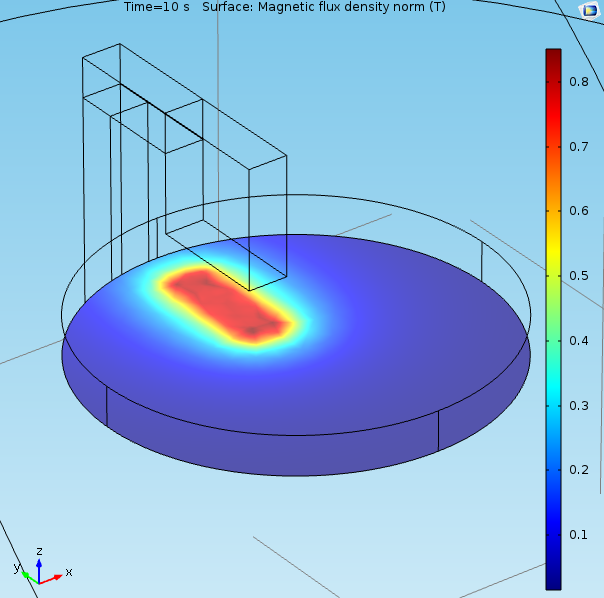

In [9]:
from IPython.display import Image
Image(filename='Images/MF.png')

Now, with the help of ode, we can calculate angular velocity of the disc. While doing this, we need to use initial angular velocity, torque data from force calculation in mef and disc inertia which was calculated in the global parameters.

Disc initial speed is 900 rpm in this simulation. Then, direction of created torque on the disc is like this:

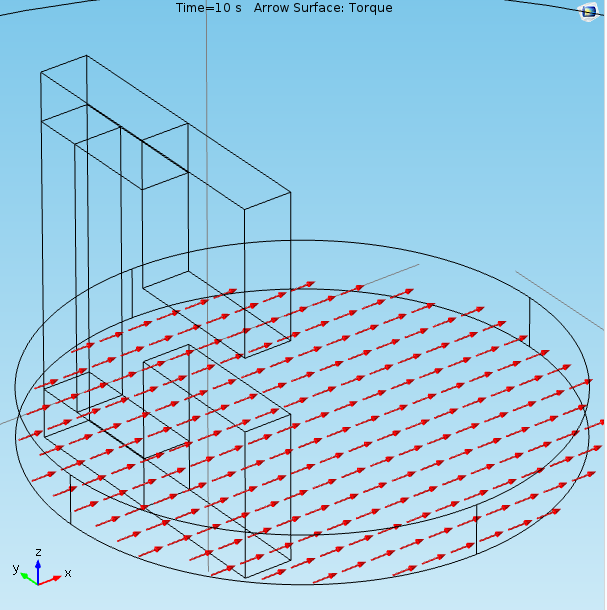

In [11]:
from IPython.display import Image
Image(filename='Images/torquedir.png')

Also, below from change of torque with time graph, it can be seen that the value of the torque decreasing to zero in approximately one second. Moreover, the maximum value of the torque is 0.0016 for that geometry.

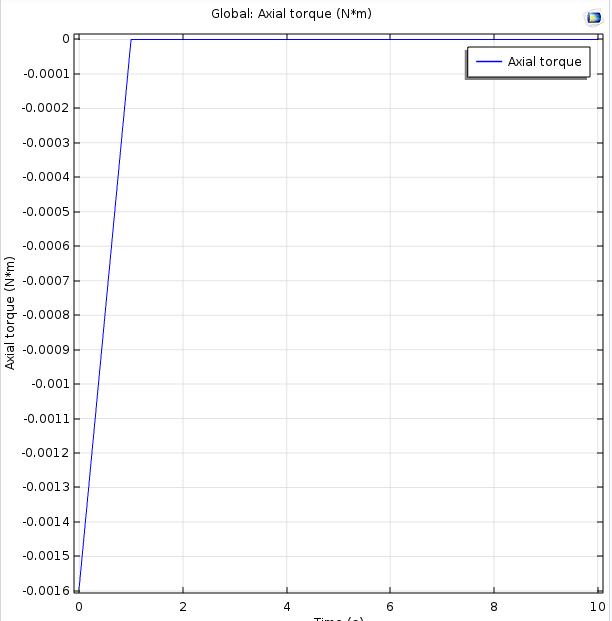

In [12]:
from IPython.display import Image
Image(filename='Images/TQ.png')

This torque is created by eddy currents on the disc. Eddy currents on the disc surface can be observed in the figure below
.

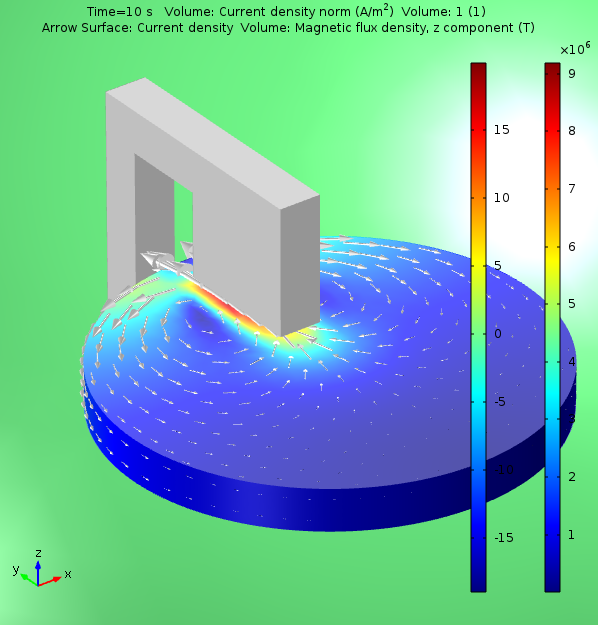

In [10]:
from IPython.display import Image
Image(filename='Images/EC.png')

Now, to increase the torque, we can change the geometry and increase the number of magnets around the disc.

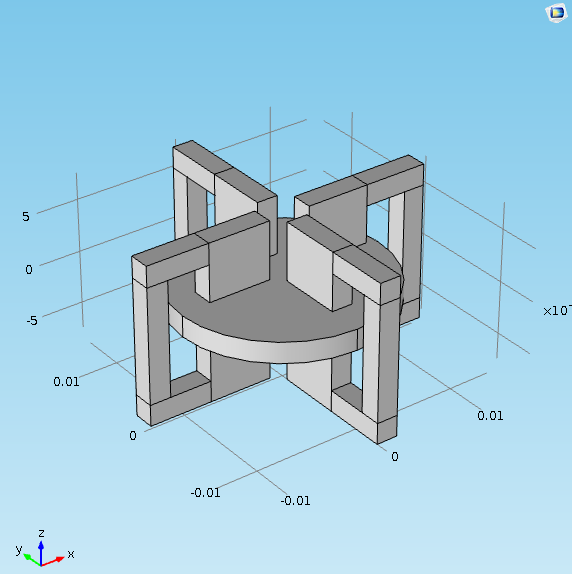

In [13]:
from IPython.display import Image
Image(filename='Images/geo4.png')

With this geometry, magnetic flux density distribution on the disc surface changes like this:


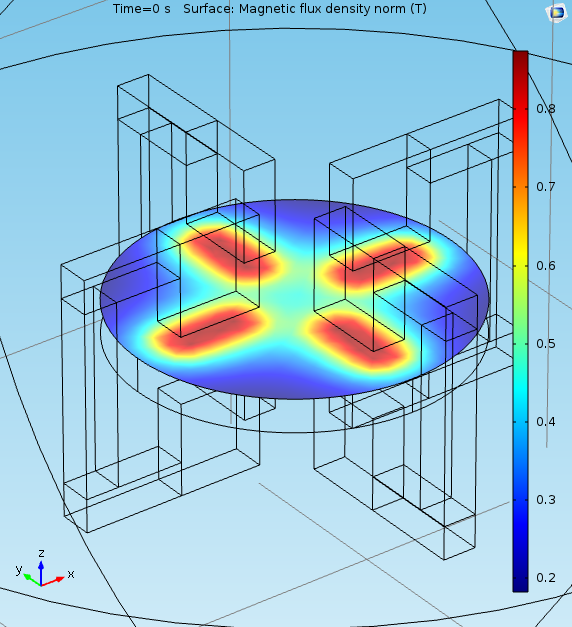

In [14]:
from IPython.display import Image
Image(filename='Images/B4.png')

Now with this geometry, disc stops in a short amount of time, aproximately 1 second. Below angular velocity is available for initial speed 1000rpm. 

In [30]:
rpm=1000
f=rpm/60
w=2*3.14*f
print ("Winitial=", w)

Winitial= 104.66666666666667


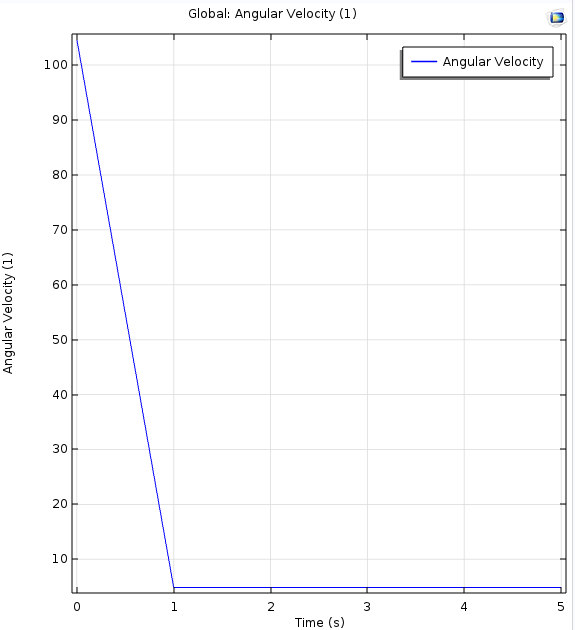

In [15]:
from IPython.display import Image
Image(filename='Images/W1000rpm4.png')

Below, the current density distribution on the disc for four magnets is given. Also, surface current density directions are available with black arrows.

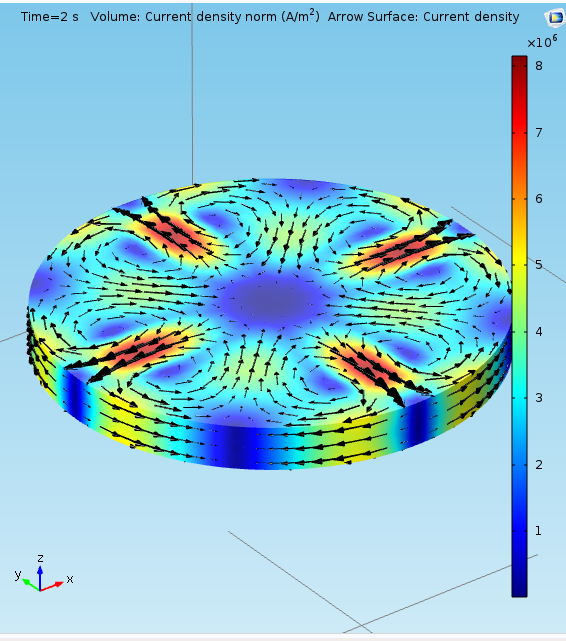

In [31]:
from IPython.display import Image
Image(filename='Images/CD4.png')

Finally, change of torque can be analysed with that graph:

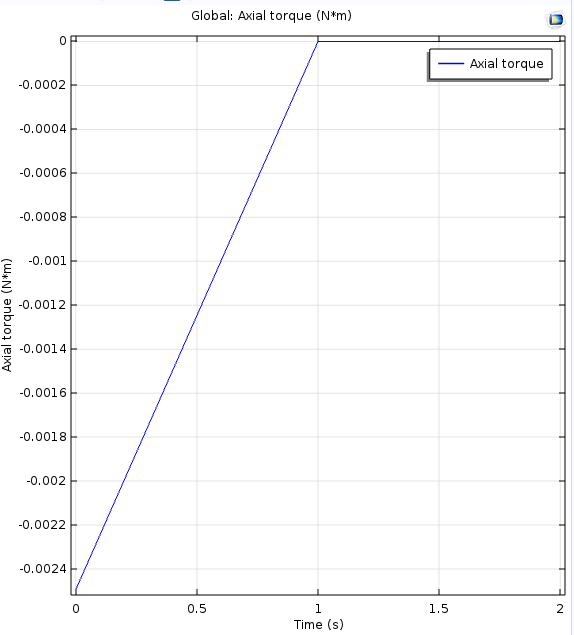

In [32]:
from IPython.display import Image
Image(filename='Images/T4.png')

Lastly, 12 magnets eddy current brake is abserved. In this system, because of the force cancellation and leakages, the result was not the one that we desire. the geometry, flux density distribution and eddy current flow figures are below:

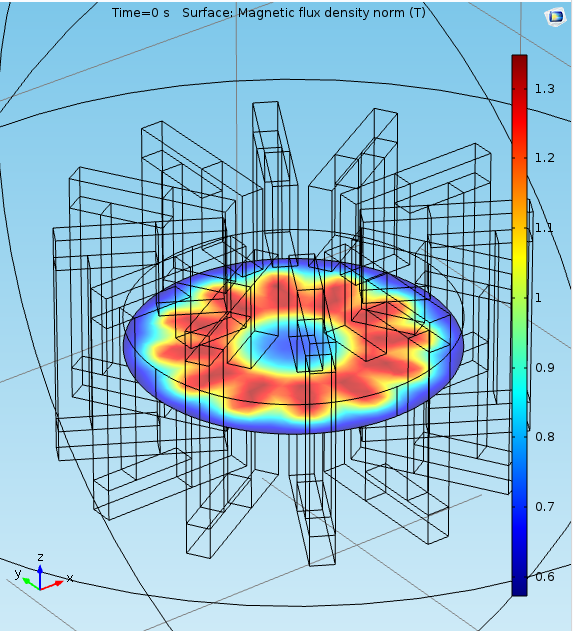

In [34]:
from IPython.display import Image
Image(filename='Images/b12.png')

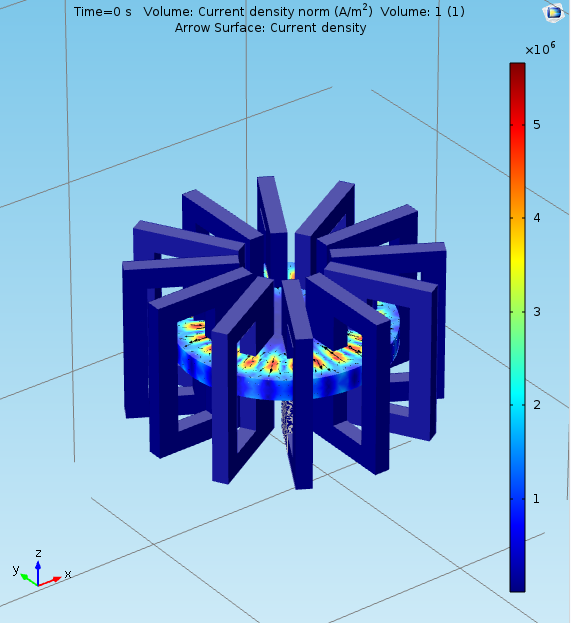

In [33]:
from IPython.display import Image
Image(filename='Images/12geo.png')

However; created initial maximum torque is only 0.0018 Nm.

Now, to increase the generated forces on the disc, we will change the polarization of the half of the magnets for four magnets break system. With this way, magnetic field does not change between 0 and Bmax. It does between -Bmax  and Bmax. Below figure shows the direction of magnetic field for each magnet in the four magnet topology that we discussed above.

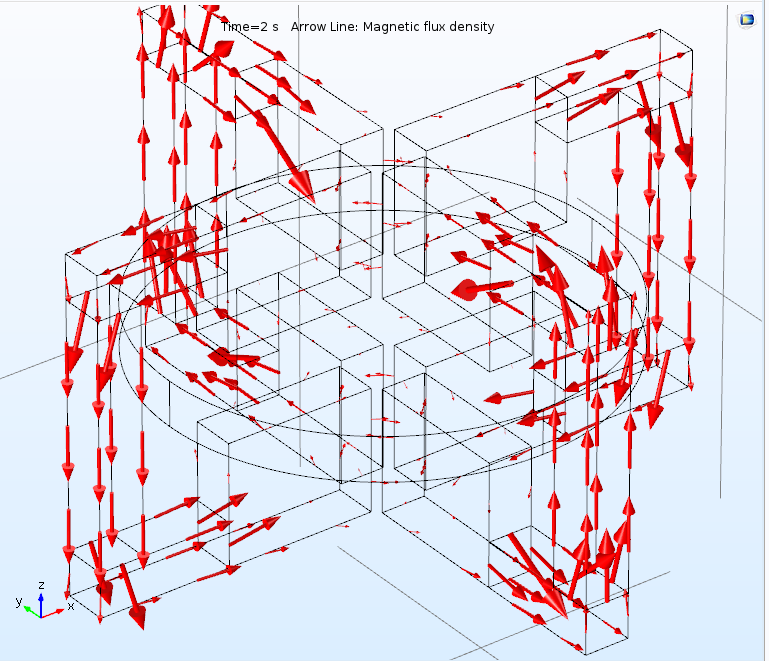

In [3]:
from IPython.display import Image
Image(filename='Images/900rpmB.png')

With this topology, induced eddy current on the disc and time dependent torque characteristics change. Lets observe eddy current density distribution on the disc:

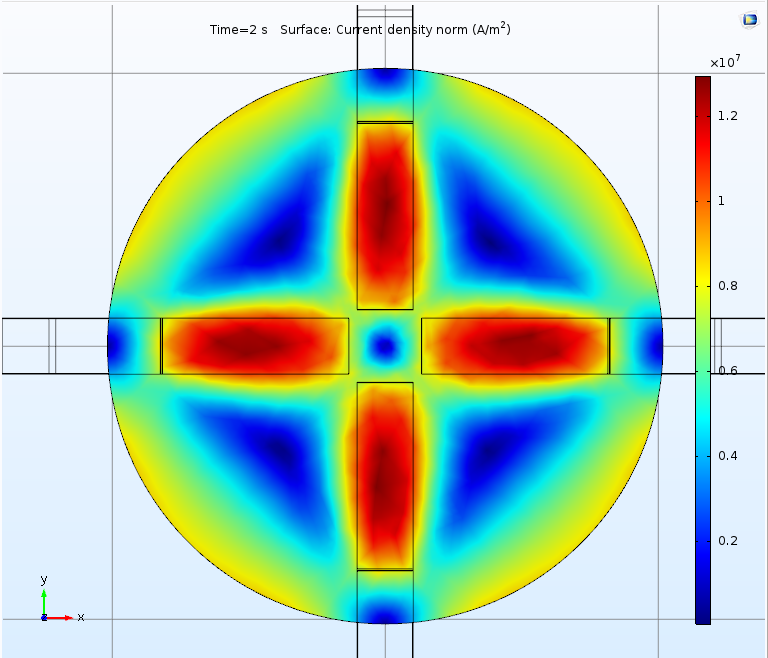

In [4]:
from IPython.display import Image
Image(filename='Images/900rpmJ.png')

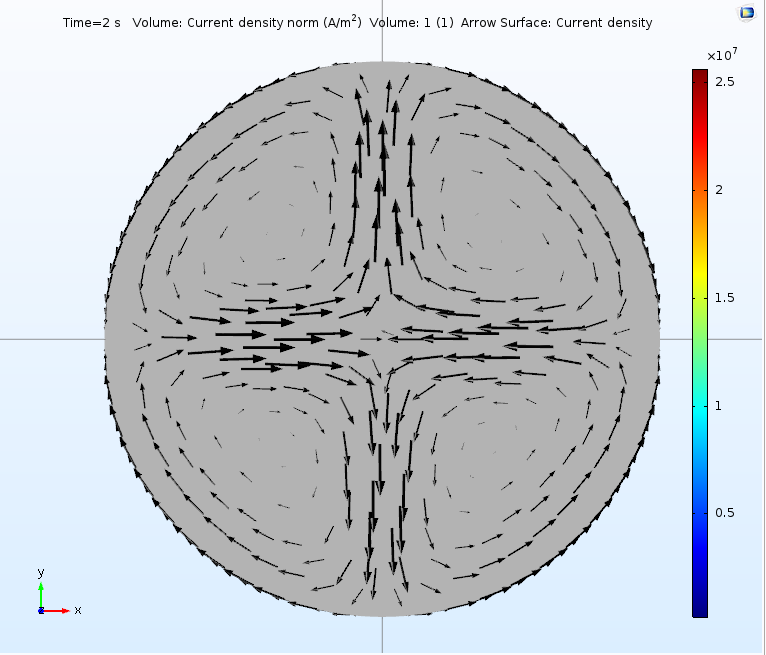

In [5]:
from IPython.display import Image
Image(filename='Images/900rpmJ2.png')

These figures are analized for 900 rpm angular disc velocity. For this speed, we get approximately 0.9 Nm as maximum generated torque for the breaking process as you can see below.

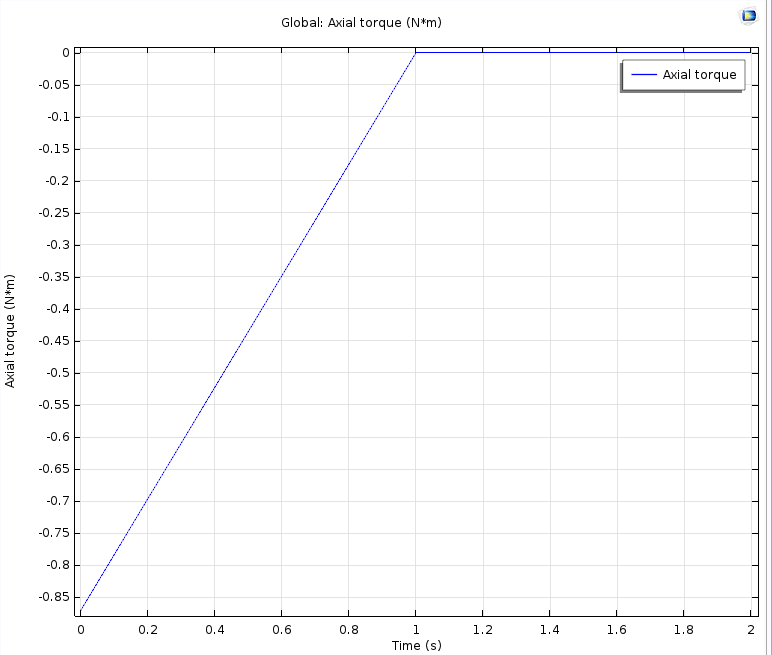

In [6]:
from IPython.display import Image
Image(filename='Images/900rpmT.png')

The same analysis will be done for 1620 rpm angular disc velocity. When we apply the same breaking topology to 1620 rpm disc, computation and solution parts take too long. Also, for this modification of the breaking system, the simulation did not end with torque values in the expectations for this angular velocity.

## Conclusion

To sum up, in this study, FEA analysis of eddy current brake was done for three different geometries. The largest torque is crated with 4 magnet system. In this system, magnets created 0.8T flux on the disc per magnet. Then, this magnetic field generates a axial torque which is 0.0025 Nm for 900 rpm angular velocity and 0.0038 Nm for 1620 rpm angular velocity. However, after changing the direction of the B of the half of the magnets induced force from the eddy current increases. Because, change of magnetic field on the disc also increases. For this case, we get 0.9 Nm maximum torque (at initial point) for 900 rpm. These torque values are very close to design expectations. Maybe, it is possible to increase the torque with totally different geometry. On the other hand, heating will be another problem for larger torque values. Finally, eddy current brake is a good alternative for these kind of brake systems. Because, magnetic energy and magnetic force are permenat phenomenons. Hence, there will be no mechanical damage during their braking.

## Bibliography
1. J.H. Wouterse, "Critical torque and speed of eddy current brake with widely separated soft iron poles" the Faculty of Electromechanics and Power Electronics, Eindhoven University of Technology , PO Box 513, 5600 MB Eindhoven, The Netherlands, July 1991
